In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Formulation Of Objective

### Linear regression:
Given data set $\mathcal{D} = (\mathbf{x}^{(1)}, y^{(1)}), ..., (\mathbf{x}^{(m)}, y^{(m)})$,
we want to learn vector of coefficients ${\Theta}$ so that:
$$\large
y^{(i)} = \mathbf{\Theta}^T\mathbf{x}^{(i)} + \epsilon^{(i)}
$$
equivalently,
$$\large
y^{(i)} = \theta_0 + \theta_1 x^{(i)}_1 + ... + \theta_d x^{(i)}_d + \epsilon^{(i)}
$$


* $\mathbf{x}^{(i)} = (x^{(i)}_0,..., x^{(i)}_d)$ are the input feature vectors.
* $\Theta = (\theta_0, ..., \theta_d)$ is the vector of coefficients, also called the model parameters.
* The error $\epsilon^{(i)}$ are independent from each other and coming from the same distribution $\mathcal{N}(0, \sigma^2)$ (Gaussian with mean $0$).

### Linear regression:
$$y^{(i)} = \mathbf{\Theta}^T\mathbf{x}^{(i)} + \epsilon^{(i)} = \theta_0 + \theta_1 x^{(i)}_1 + ... + \theta_d x^{(i)}_d + \epsilon^{(i)}
$$
Goal: we want to minimize this
$$\text{Loss} = \frac{1}{m} \sum_{i=1}^m {(y^{(i)} - \Theta^T\mathbf{x}^{(i)} )^2}
$$
This is the _least-squares_ objective.

**Question:** Why is this the right objective to minimize? Why not
$$\frac{1}{m} \sum_{i=1}^m |y^{(i)} - \Theta \mathbf{x}^{(i)}| $$
Or
$$\frac{1}{m} \sum_{i=1}^m (y^{(i)} - \Theta \mathbf{x}^{(i)})^4 $$ ?


### Lasso regression:
Similar to basic linear regression, but with objective of minimizing:
$$\text{Loss} = \frac{1}{m}\left(\sum_{i=1}^m {(y^{(i)} - \Theta^T\mathbf{x}^{(i)} )^2} \right) + \left(\alpha  \sum_{i=0}^d \theta_d\right)
$$

- $\left(\alpha  \sum_{i=0}^d \theta_d \right)$ is the regularization term.

- **Question:** What's a better explanation for the regularization term:   $\left(\alpha  \sum_{i=0}^d \theta_d\right)$,  besides the fact that it works well?



## Probability Theory

### Preview of how we'll use probability:

$\Theta = (\theta_0,...,\theta_d)$

Imagine $\Theta$ lives in the space of all possible parameters. We will want to find the "most likely" $\Theta$ given the data $\mathcal{D}$. That is, find:
$$\DeclareMathOperator*{\argmax}{argmax} $$
$$\DeclareMathOperator*{\argmin}{argmin} $$
 $$\argmax_\Theta  p(\Theta|\mathcal{D}). $$

### Probability: notations

* If $A$ is an _event_, $P(A)$ denotes the _probability of $A$_. 
* $P(A)$ is a number between 0 and 1.
* If $A, B$ are 2 events, the probability of "$A$ and $B$" is denoted by $P(A, B)$ (also sometimes written as $P(A\cap B)$).

### Probability: conditional
* Given _events_ $A, B$, we denote $P(A|B)$ the conditional probablity of $A$ given $B$, and it is defined as:
$$
P(A|B) := \frac{P(A,B)}{P(B)}
$$

**Example**: Given a population of people, each person has `age` and `height` attributes, let $A$="`age < 10`" and $B$="`height > 1.6m`".

Let $T$ be the total number of people.
$$
P(A|B) = \frac{P(A,B)}{P(B)} = \frac{\text{#( age<10 and height>1.6 )} / T}{\text{#( height>1.6 )} / T}
$$
$$
P(A|B) = \frac{\text{#( age<10 and height>1.6 )} }{\text{#( height>1.6 )} }
$$

You can think of $P(A|B)$ as probability of $A$ in the _restricted population of just $B$_.

### Bayes' rule: (on events)
Given the definition $P(A|B) := \frac{P(A,B)}{P(B)}$ for any 2 events $A, B$, it follows that:
$$
P(A|B) = \frac{P(B|A) . P(A)}{P(B)}
$$

$P(A|B) P(B) = P(A, B) = P(B|A)P(A)$
So $$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$

### Continuous random variable
If $x$ is a continuous random variable, $p(x)$ denotes the density function of $x$.
+ For example: The bell curve - density function for a Gaussian/Normal random variable
+ **Note**: Writing $p(x)$ is slight abuse of mathematical notation, since $x$ here means both the random variable and the possible $\mathbb{R}$ values of this variable. (The proper way is to name the random variable $X$ and its density $p_X(x)$, but we will go with $p(x)$ for short. Just remember that $p(x)$ and $p(y)$ are different density functions even though they are both named $p$)

**Question**: what properties must a probability density function have?

$$\int_{-\infty}^\infty p(x)dx = 1$$
* $x$ in the above equation is simply the possible real values of the random variable whose density function is $p$.

If $\mathbf{x}=(x_1, x_2)$ is 2-dimensional
$$\int p(\mathbf{x}) d\mathbf{x} = \iint p(x_1, x_2) dx_1 dx_2 = 1.$$
This generalizes to $\mathbf{x}$ of any dimension.

### Joint and marginals
Let $x, y$ be 2 continuous real valued random variables. (For example `(age, height)` of members of a population.)
* $p(x,y)$ is called the joint probability distribution of $x, y$.
* $p(x)$ and $p(y)$ are the marginal distributions. We have
$$p(x) = \int_{-\infty}^\infty p(x,y) dy$$
and 
$$p(y) = \int_{-\infty}^\infty p(x,y) dx$$


### Bayes' rule for densities:
$$
p(x|y) = \frac{p(y|x)p(x)}{p(y)} 
$$
* The denominator $p(y)$ is constant as $x$ varies. So we can think of it as a normalizing constant. Thus $p(x|y)$ is proportional to $p(y|x)p(x)$ as functions of $x$. (Think of $y$ as fixed).
* We write $p(x|y) \propto p(y|x)p(x)$ to indicate that these functions are proportional.

### Being bayesian:
The Bayes' rule from previous slide extend to higher dimensions - from $x,y$ to vectors $\mathbf{x}, \mathbf{y}$

We can apply the general Bayes' rule for: $\Theta$ the vector of model parameters, and $\mathcal{D}$ the vector of observed data points:
$$
p(\Theta|\mathcal{D}) = \frac{p(\mathcal{D}|\Theta)p(\Theta)}{p(\mathcal{D})} 
$$
Each term has a meaning:
- $p(\Theta|\mathcal{D})$ (the posterior): our belief as to which parameters are likely after observing data
- $p(\Theta)$ (the prior): our belief as to which parameters are likely before observing data
- $p(\mathcal{D}|\Theta)$ (the likelihood): how likely to have observed $\mathcal{D}$ given model $\Theta$
- $p(\mathcal{D})$: the normalizing constant.


$$
p(\Theta|\mathcal{D}) \propto p(\mathcal{D}|\Theta)p(\Theta)
$$
### Goal:

- Find the $\Theta$ that maximizes $p(\Theta|\mathcal{D})$. (That is, find $\argmax_\Theta p(\Theta|\mathcal{D})$.) This is called the maximum a posteriori (MAP) estimate. By Bayes' rule, this is equivalent to maximizing ${p(\mathcal{D}|\Theta)p(\Theta)}$.


- If we assume a uniform prior: $p(\Theta)$ is a constant, then the above is equivalent to only maximizing the likelihood: $p(\mathcal{D}|\Theta)$. This is called the maximum likelihood estimate (MLE).

**Note**: MLE is a special case of MAP when we assume uniform prior.

### Back to linear regression:
Recall the hypothesis for linear regression:
$$
y^{(i)} = \Theta^T \mathbf{x}^{(i)} + \epsilon^{(i)}
$$
where $\epsilon^{(i)} \sim \mathcal{N}(0, \sigma^2)$.

That's equivalent to $y^{(i)} \sim \mathcal{N}(\Theta^T \mathbf{x}^{(i)}, \sigma^2)$.

So,
$$
p(y^{(i)}|\Theta, \mathbf{x}^{(1)},..., \mathbf{x}^{(m)}) = p(y^{(i)}|\Theta, \mathbf{x}^{(i)}) $$

$$
= \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y^{(i)} - \Theta^T\mathbf{x}^{(i)})^2}{2\sigma^2}\right).
$$

The first equality is because $y^{(i)}$ only depends on $\mathbf{x}^{(i)}$.

Expanding "data": $\mathcal{D} = \mathbf{x}^{(1)}, y^{(1)}, ... \mathbf{x}^{(m)}, y^{(m)} $, let $\mathbf{X} = \{\mathbf{x}^{(i)}\}_{i=1}^m$ and $\mathbf{Y} = \{y^{(i)}\}_{i=1}^m$.

By Bayes' rule, with $\mathbf{X}$ always observed in all densities:
$$
p(\Theta | \mathbf{Y}, \mathbf{X}) \propto p(\mathbf{Y}|\Theta, \mathbf{X}) p(\Theta | \mathbf{X})
$$


We assume a uniform prior belief about $\Theta$, i.e. $p(\Theta | \mathbf{X})$ can be treated as a constant. So finding the most likely $\Theta$ given data is equivalent to finding a Maximum Likelihood Estimate (MLE):
$$
\argmax_\Theta p(\Theta | \mathbf{Y}, \mathbf{X})  = \argmax_\Theta  p(\mathbf{Y}| \Theta, \mathbf{X}) 
$$
$$
= \argmax_\Theta p(y^{(1)},...,y^{(m)}| \Theta, \mathbf{X}) 
$$
$$
= \argmax_\Theta \prod_{i=1}^m p(y^{(i)}| \Theta, \mathbf{X}) 
$$

$$
= \argmax_\Theta \prod_{i=1}^m p(y^{(i)}| \Theta, \mathbf{X}) 
$$

$$
= \argmax_\Theta \log\left( \prod_{i=1}^m p(y^{(i)}| \Theta, \mathbf{X}) \right)
$$

$$
= \argmax_\Theta  \sum_{i=1}^m \log p(y^{(i)}| \Theta, \mathbf{X})
$$

$$
= \argmin_\Theta   \sum_{i=1}^m - \log p(y^{(i)}| \Theta, \mathbf{X})
$$

$$
= \argmin_\Theta   \sum_{i=1}^m - \log p(y^{(i)}| \Theta, \mathbf{X})
$$

$$= \argmin_\Theta  \sum_{i=1}^{m} - \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y^{(i)} - \Theta^T\mathbf{x}^{(i)})^2}{2\sigma^2}\right)\right)$$

$$= \argmin_\Theta  \sum_{i=1}^m - \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) + \sum_{i=1}^m\frac{(y^{(i)} -\Theta^T\mathbf{x}^{(i)})^2}{2\sigma^2}$$

$$ = \argmin_\Theta \sum_{i=1}^m(y^{(i)} -\Theta^T\mathbf{x}^{(i)})^2$$

### Conclusion:
$$\text{minimizing } \frac{1}{m}\sum_{i=1}^m {(y^{(i)} - \Theta^T\mathbf{x}^{(i)} )^2}
\iff \text{maximizing } p(\Theta|\mathcal{D})
$$


# Generate Synthetic Data

In [2]:
X = np.expand_dims(np.arange(1, 101, 1), axis=0).T
eps = np.random.normal(size=(100, 1)) * 6
m = np.array([[3]])

y = X @ m + eps

In [3]:
X.shape

(100, 1)

In [3]:
(X @ m).shape

(100, 1)

In [4]:
X.shape, eps.shape, y.shape

((100, 1), (100, 1), (100, 1))

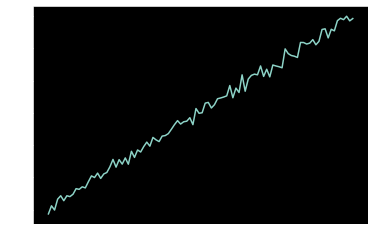

In [5]:
plt.plot(np.squeeze(X), np.squeeze(y))

# One Step

In [6]:
weights = np.array([[1]])
y_hat = X @ weights

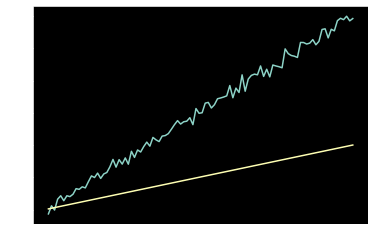

In [7]:
plt.plot(np.squeeze(X), np.squeeze(y))
plt.plot(np.squeeze(X), np.squeeze(y_hat))

In [8]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2) * 0.5

In [9]:
error = mean_squared_error(y, y_hat); error

6845.5700209948045

In [10]:
def mse_gradient(y_true, y_pred, X, alpha):
    return (alpha / len(y_true)) * (X.T @ (y_pred - y_true))

In [11]:
gradient = mse_gradient(y, y_hat, X, 3e-4); gradient.shape

(1, 1)

In [12]:
weights = weights - gradient; weights

array([[3.03882851]])

In [13]:
y_hat = X * weights 
plt.plot(np.squeeze(X), np.squeeze(y))
plt.plot(np.squeeze(X), np.squeeze(y_hat))

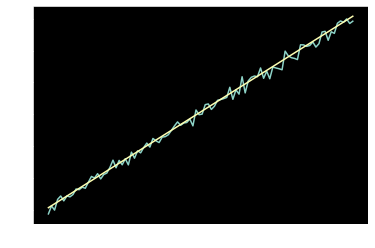

In [14]:
plt.plot(np.squeeze(X), np.squeeze(y))
plt.plot(np.squeeze(X), np.squeeze(y_hat))

# The Class

In [15]:
class LinearRegressor():
    def __init__(self):
        self.weights = np.array([[1]])
        self.history = {}
    def predict(self, X):
        y_hat = X @ self.weights
        return y_hat
    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_pred - y_true) ** 2) * 0.5
    def mse_gradient(self, y_true, y_pred, X, alpha):
        return (alpha / len(y_true)) * (X.T @ (y_pred - y_true))
    def fit(self, X, y, lr = 1e-5, steps = 10):
        for step in range(steps):
            y_hat = self.predict(X)
            error = self.mean_squared_error(y, y_hat)
            gradient = self.mse_gradient(y, y_hat, X, lr)
            self.weights = self.weights - gradient
            self.history[step] = {"gradient": np.squeeze(gradient), "error": error}

In [16]:
reg = LinearRegressor()

In [17]:
y_hat = reg.predict(X)

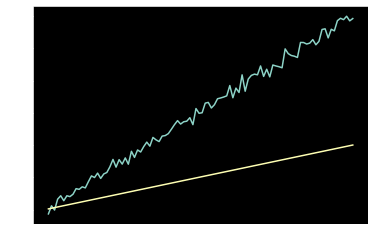

In [18]:
plt.plot(np.squeeze(X), np.squeeze(y))
plt.plot(np.squeeze(X), np.squeeze(y_hat))

In [19]:
reg.fit(X, y, steps=100)

In [20]:
timesteps = list(reg.history.keys())
gradients = [timestep['gradient'] for timestep in reg.history.values()]
errors = [timestep['error'] for timestep in reg.history.values()]

In [21]:
y_hat = reg.predict(X)

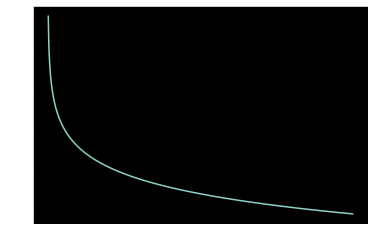

In [22]:
plt.plot(errors, timesteps)

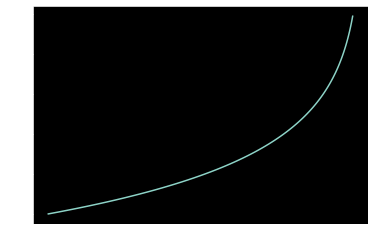

In [23]:
plt.plot(np.squeeze(gradients), np.squeeze(timesteps))

In [24]:
gradients[0]

array(-0.06796095)

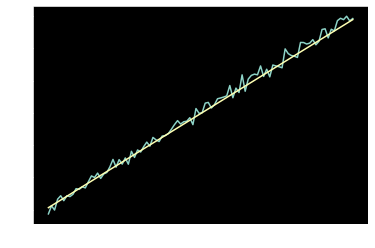

In [25]:
plt.plot(np.squeeze(X), np.squeeze(y))
plt.plot(np.squeeze(X), np.squeeze(y_hat))

# Multivariate Linear Regression

In [26]:
n_features = 3
n_rows = 100

X = np.random.normal(size=(n_rows, n_features))
eps = np.random.normal(size=(1), scale=0.001)
m = np.ones((n_features, 1)) * 3

y = X @ m + eps

In [27]:
(X @ m).shape

(100, 1)

In [28]:
X.shape, m.shape, eps.shape

((100, 3), (3, 1), (1,))

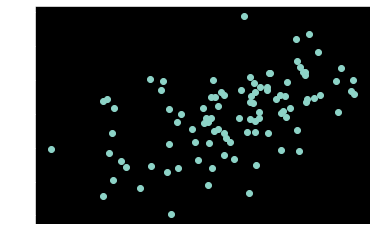

In [29]:
plt.scatter(X[:,0], y)

In [30]:
weights = np.ones((n_features, 1))
y_hat = X @ weights

In [31]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2) * 0.5

In [32]:
error = mean_squared_error(y, y_hat); error

6.5172410871801345

In [33]:
weights = np.ones((n_features, 1))

In [34]:
def mse_gradient(y_true, y_pred, X, alpha):
    return (alpha / len(y_pred)) * (X.T @ (y_pred - y_true))

In [35]:
gradient = mse_gradient(y, y_hat, X, 8e-3); gradient

array([[-0.01567354],
       [-0.01769319],
       [-0.01877155]])

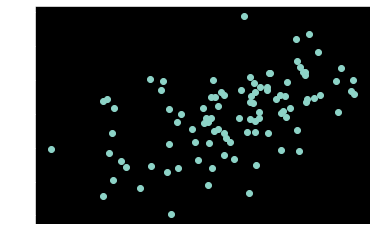

In [36]:
plt.scatter(X[:,0], y)

In [37]:
X_plot = np.vstack([np.arange(-2,2,0.1), np.arange(-2,2,0.1), np.arange(-2,2,0.1)]).T
y_hat = np.matmul(X_plot, weights)

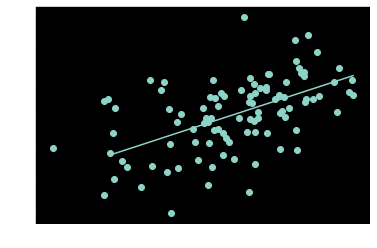

In [38]:
plt.plot(X_plot[:,0], y_hat[:len(X_plot)])
plt.scatter(X[:,0], y)

In [39]:
weights = np.ones((n_features, 1)) * -3

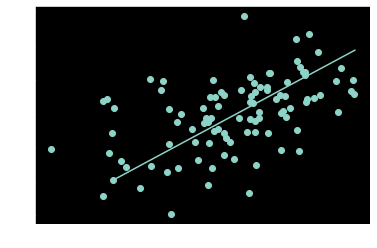

In [54]:
X_plot = np.vstack([np.arange(-2,2,0.1), np.arange(-2,2,0.1), np.arange(-2,2,0.1)]).T

y_hat = np.matmul(X, weights)
gradient = mse_gradient(y, y_hat, X, 1e-1)
weights = weights - gradient; 

y_hat_plot = np.matmul(X_plot, weights)

plt.scatter(X[:,0], y)
plt.plot(X_plot[:,0], y_hat_plot)

# Class

In [69]:
class LinearRegressor():
    def __init__(self):
        self.history = {}
    def predict(self, X):
        y_hat = X @ self.weights
        return y_hat
    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_pred - y_true) ** 2) * 0.5
    def mse_gradient(self, y_true, y_pred, X, alpha):
        return (alpha / len(y_true)) * (X.T @ (y_pred - y_true))
    def fit(self, X, y, lr = 1e-5, steps = 10):
        self.weights = np.ones((n_features, 1))
        for step in range(steps):
            y_hat = self.predict(X)
            error = self.mean_squared_error(y, y_hat)
            gradient = self.mse_gradient(y, y_hat, X, lr)
            self.weights = self.weights - gradient
            self.history[step] = {"gradient": np.squeeze(gradient), "error": error}

In [70]:
reg = LinearRegressor()

In [79]:
reg.fit(X, y, steps=20)

In [85]:
y_hat_plot = reg.predict(X_plot)

In [86]:
y_hat_plot.shape, X_plot[:,0].shape

((40, 1), (40,))

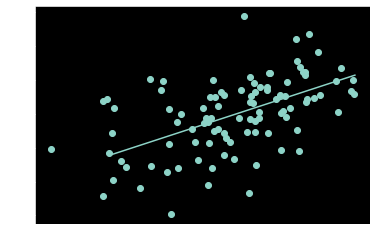

In [88]:
plt.scatter(X[:,0], y)
plt.plot(X_plot[:,0], y_hat_plot)